# Introduction to machine learning

*Maxime Sangnier*

Fall, 2022

## Practical session 5: spectral clustering and agglomerative approaches

# Table of contents
1. [Spectral clustering](#part1)
1. [Agglomerative clustering](#part2)


In [1]:
from mllab import *


Packages:
	nympy as np
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	plotXY
	plot_frontiere
	map_regions
	covariance
	plot_cov
	sample_gmm



# Spectral clustering <a id="part1"></a>


>Draw a random sample of size 100 from the [moons](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) distribution with noise set to $0.05$.

>We consider [spectral clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) with two clusters and a Gaussian kernel.
Cluster the sample with various values of the kernel parameter $\gamma \in \{10^{-3}, 10^{-2}, \dots, 10^3\}$ and display the results on subplots (use different colors for the two clusters).

In [ ]:
# Answer

>What is the best value for $\gamma$?
Compare it to the noise variance.

**Answer:**
…

>Do the same with a nearest neighbors affinity matrix and with the number of neighbors in $\{2, 4, \dots, 18\}$.

In [ ]:
# Answer

>Now, we focus on clustering (based on the colors) a part of [Kandinsky's painture](https://perso.lpsm.paris/~msangnier/files/pythonM2/img/cercles.jpg), called *several circles*.
For this purpose, the following script loads the image and extract the subpart of interest in the data matrix X.

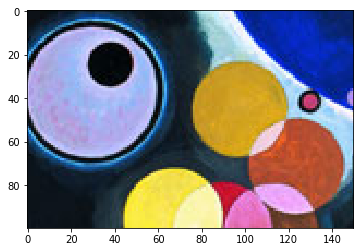

In [4]:
# Image is at https://perso.lpsm.paris/~msangnier/files/pythonM2/img/cercles.jpg
im = plt.imread("/home/maxime/python/img/cercles.jpg")

plt.figure()
plt.imshow(im)

plt.figure()
plt.imshow(im[300:400, 50:200])

In [5]:
X = np.reshape(im[300:400, 50:200], (-1, 3))
print(X.shape)

(15000, 3)


>Apply [spectral clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering) with a 15-nearest neighbors affinity matrix and 10 clusters.
Show the image resulting from the clustering with the colormap *jet*.

In [ ]:
# Answer

# Agglomerative clustering <a id="part2"></a>


>Here, we aim at comparing the four common linkage methods provided for agglomerative clustering:
1. single linkage;
1. complete linkage;
1. average linkage;
1. Ward's method.

>With the help of the following functions, draw a sample of size 200 of rectangle clusters and plot it.

In [7]:
def make_rect(center=[0, 0], width=2, size=1):
    """Random points in a square.
    """
    X = (np.random.rand(size, 2) + np.asarray(center) - np.r_[0.5, 0.5])
    X[:, 0] *= width
    return X

def make_clusters(size=1, width=4):
    """Random points in 2 close rectangles.
    """
    ind = np.sort(np.random.randint(0, high=size, size=1))[0]
    sizes = [ind, size-1-ind]
    centers = [[0, 1], [0, -1]]
    return np.concatenate([make_rect(c, size=s, width=width) for c, s in zip(centers, sizes)])

In [ ]:
# Answer

>For the purpose of the comparison (single linkage does not exist in scikit-learn), we consider the following object for agglomerative clustering.

>Apply agglomerative clustering with single linkage and 2 clusters to the previously drawn sample and plot the results (use two different colors for the two clusters).

In [ ]:
# Answer

>We want to compare the resulting clustering for:
- different number of clusters;
- the four linkage methods.

>Complete the following functions, that is aimed to do so, and apply it to the dataset.
It should display the resulting clustering for the four linkage methods and for 4, then 2, clusters.

In [ ]:
# Answer
def compare_agg(X, n_clusters=[2], methods=["single"], figsize=(15, 5)):
    plt.figure(figsize=figsize)  # Create figure with appropriate size
    for k in n_clusters:
        plt.figure(figsize=figsize)
        # Fit each method and plot the prediction
        # Todo

        # End todo

In [ ]:
# Answer

>Analyze the results for each method.
Which one produces the "expected" clustering?

**Answer:**
…

>Do the same experiment and analysis for a single rectangle dataset.
Overall, which methods are perferable?

In [ ]:
# Answer

**Answer:**
…

>Using the functions from the previous practical session, sample 200 points from a Gaussian mixture model with 3 modes.

>Use the [agglomerative clustering](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) class from scikit-learn to compare complete, average and Ward's method with 4, then 3, clusters.

>Was the results expected?

In [16]:
def covariance(sigma1=1., sigma2=1., theta=0.):
    """
        Covariance matrix with eigenvalues sigma1 and sigma2, rotated by the angle theta.
    """
    rotation = np.array([[np.cos(theta), -np.sin(theta)],
                        [np.sin(theta), np.cos(theta)]])
    cov = np.array([[sigma1, 0.],
                   [0, sigma2]])
    return rotation.dot(cov.dot(rotation.T))

def sample_gm(weights, means, covariances, size=1):
    """Sample points from a Gaussian mixture model specified by the weights, the means
    and the covariances. These three parameters are lists."""
    X = None
    p = np.random.multinomial(1, weights, size=size)
    for (m, c, i) in zip(means, covariances, p.T):
        Y = np.random.multivariate_normal(m, c, size=size)
        if X is None:
            X = Y.copy()
        else:
            X[i==1] = Y[i==1]
    return X

In [ ]:
# Answer

**Answer:**
…